<h1 align="center">Mall Customer Segmentation</h1>

<center><img src="https://miro.medium.com/max/12000/1*O5PLTgkp9FZFUiWyl0EMNA.jpeg" width="1000" height="400"></center>

## Table of Contents
#### [1.Business Task](#1)
#### [2.Basic Understanding Our Data](#2)
#### [3.Data Visualization](#3)
#### [4.Kmeans Clustering](#4)
#### [5.Summary](#5)

### Business Task<a id=1></a>

- In this dataset we will use the mall dataset to understand customers spending behaviour and cluster them based on their annual income and spending score.
- First We will understand data with some statistical and visualization tool . After We understand deeply our dataset. We will use clustering algorithm K-Means to group them and get insight from grouped customers. 

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Read Our Dataset

In [77]:
df = pd.read_csv("Mall_Customers.csv")

### Basic Understanding Our Data <a id=2></a>

In [78]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Cleaning

#### Checking Missing Values

In [81]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- ##### Dataset has no missing values 

#### Drop Unnecesary Columns

-  CustomerId is unneccesary columns , ıt does not give us any inofrmation. Let's delete it 

In [82]:
df.drop("CustomerID",axis = 1,inplace = True)

### Data Visualization<a id=3></a>

#### Univariate Analysis

#### "Gender"

<AxesSubplot:xlabel='Gender', ylabel='count'>

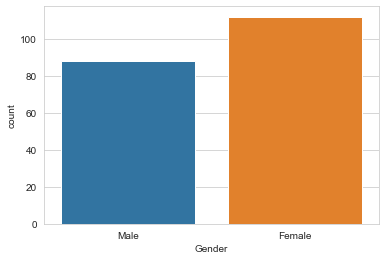

In [83]:
sns.countplot(x = "Gender",data = df)

- Mall is getting more female compared to man.

#### "Age"

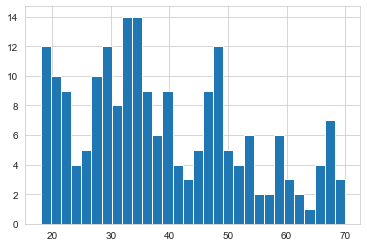

In [84]:
plt.hist(df["Age"],bins = 30)
plt.show()

-  Most customers in the mall are 35-36 years old. There are also many people aged 19-20 and 47-48.

#### "Annual Income"

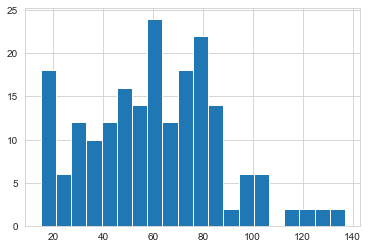

In [85]:
plt.hist(df["Annual Income (k$)"],bins = 20)
plt.show()

-  We see that most annual income of people is around 60 000 $ 
-  There are less people who have higher annual income between 110-40k 

#### "Spending Score" 

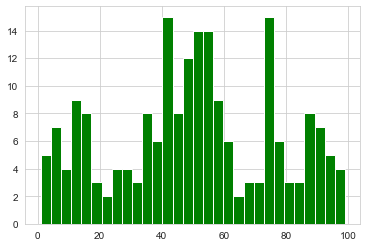

In [86]:
plt.hist(df["Spending Score (1-100)"],bins = 30,color = "g")
plt.show()

- Most people have a spending score between 40-60 

#### Let's see if there is a difference Spending Score by Gender

<AxesSubplot:xlabel='Gender'>

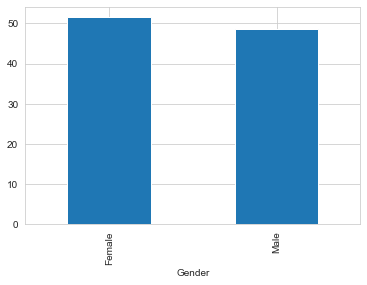

In [87]:
df.groupby("Gender")["Spending Score (1-100)"].mean().plot.bar()

- Almost the same !
- There is a slightly difference spending score between them .

#### Let's Check Average Annual Income by Gender

<AxesSubplot:xlabel='Gender'>

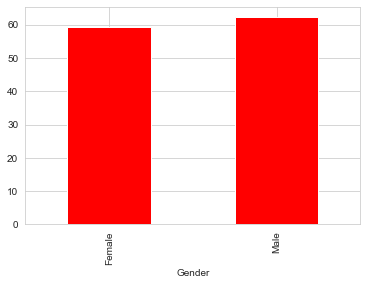

In [88]:
df.groupby("Gender")["Annual Income (k$)"].mean().plot.bar(color = "r")

### Multivariate Analysis

#### Age vs Spending Score by Gender

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

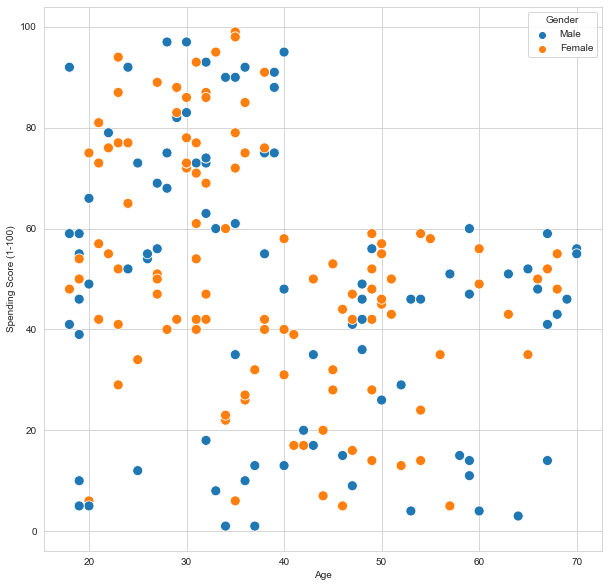

In [89]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "Age",y = "Spending Score (1-100)",data = df,color = "r",hue = "Gender",s =100)

- As we have seen above people who are younger ( aged under 35-40 ) have higher spending score. Higher spending score means more money to spend from these perticular people.
-  Older people likely to spend less money .

#### Annual Income vs Spending Score

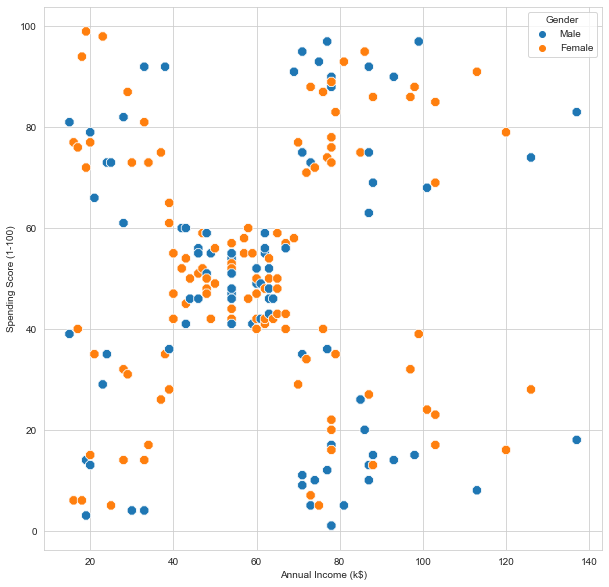

In [90]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "Annual Income (k$)",y="Spending Score (1-100)",data = df,hue = "Gender",s =100,marker ="8")
plt.show()

-  Allright, There is no correlation between Annual İncome vs Spending Score. But  This plot might give us valuable insight about segmenting our customers!
- As we have seen above , there is a pattern that we can use for further analysis. This pattern can be like this ;
- **People who have lower annual income and lower spending score**
- **People who have lower income and higher spending score )** *(Don't do this :) )* 
- **People who have average income and average spending score**
- **People who have higher income and low spending score**
- **People who have higher income and higher spending score**

### Correlations Between Variables

<AxesSubplot:>

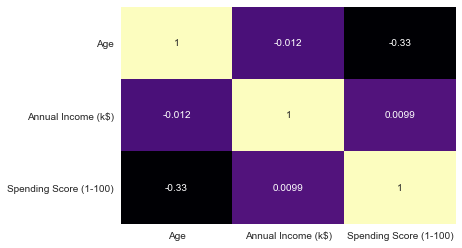

In [91]:
sns.heatmap(df.corr(),annot = True,cbar = False,cmap = "magma")

- There is a negative correlation between Spending Score and Age 
- When people get older , spending score is decreasing.( It's not a strong correlation )

### K-Means Clustering<a id=4></a>

### Choosing Our Variables for Clustering 

In [92]:
X = df.iloc[:,2:4].values

### Standardize the Variables

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
scaled_df = scaler.fit_transform(X)

### Finding Optimal Clustering Number with Elbow Method

In [96]:
from sklearn.cluster import KMeans

In [97]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(scaled_df)
    cost.append(kmean.inertia_)

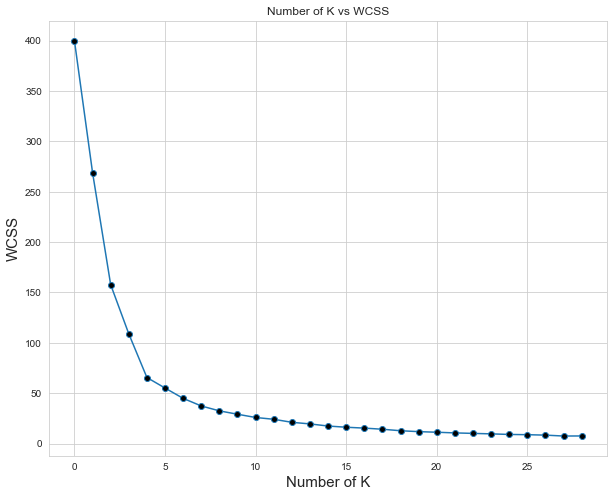

In [98]:
plt.figure (figsize = (10,8))
plt.plot(cost,marker = "o",markerfacecolor='black')
plt.xlabel("Number of K",fontsize =15)
plt.ylabel("WCSS",fontsize =15)
plt.title("Number of K vs WCSS")
plt.show()

#### Choosing k = 5

In [123]:
kmeans = KMeans(n_clusters=5)

In [124]:
kmeans.fit(scaled_df)

KMeans(n_clusters=5)

In [125]:
prediction = kmeans.predict(scaled_df)

In [126]:
labels = kmeans.labels_

### Concatinating Labels with Our Dataset

In [127]:
df1=  pd.DataFrame({'Annual Income':X[:,0],'Spending Score':X[:,1],"Cluster":labels,})

In [128]:
df1.head()

,Annual Income,Spending Score,Cluster
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


### Visualization Labels

<Figure size 1440x1440 with 0 Axes>

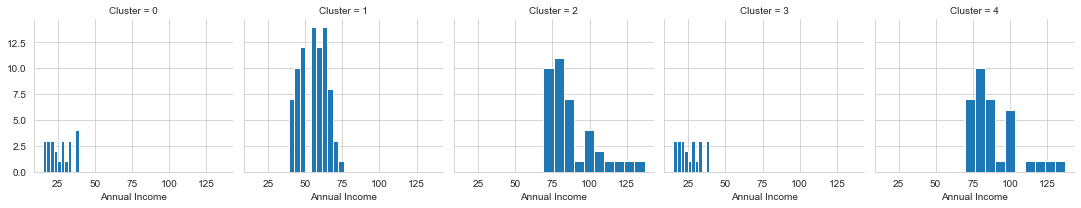

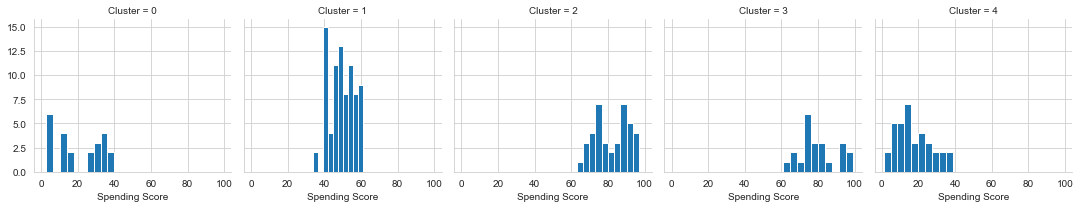

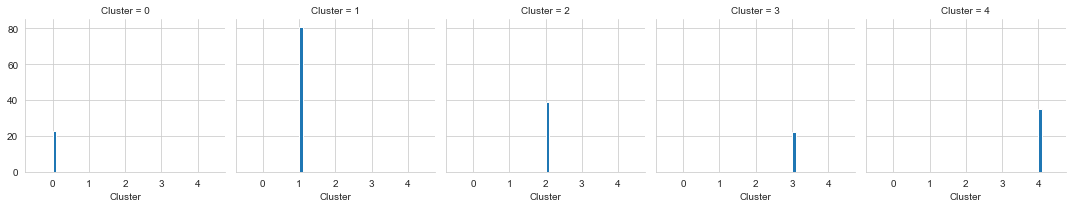

In [129]:
plt.figure(figsize = (20,20))
for c in df1:
    grid= sns.FacetGrid(df1, col='Cluster')
    grid.map(plt.hist, c)

### Visualization of Clusters

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

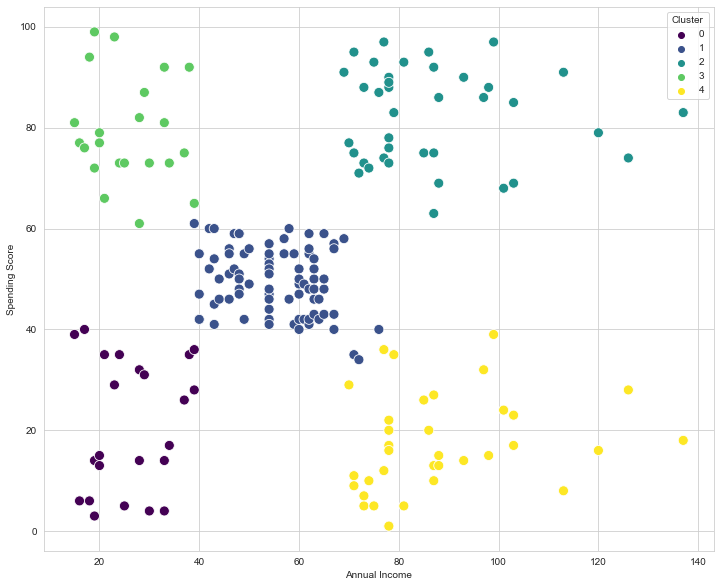

In [130]:
plt.figure(figsize =(12,10))
sns.scatterplot(x= 'Annual Income',y = 'Spending Score',hue = 'Cluster',data=df1,palette = 'viridis',s = 100)

### Summary<a id=5></a>

- Cluster 0 includes people who have lower income and spending score 
- Cluster 1 includes people who have annual income between 40-60k and their spending score is average 
- Cluster 2 is people who spend more money and their annual income is high
- Cluster 3 consists of people who have high spending score although their annual income is low .
- Cluster 4 is higher income but they don't spend money on shopping a lot .
